# This file is used to visualize the wrestler and metric dataframes.

In [1]:
import matplotlib as mpltlib
import matplotlib.pyplot as plt
import seaborn 
import datetime
import pandas as pd
import rank_helper
import numpy as np


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 10)

In [2]:
df = pd.read_csv(f'tournaments_all_final.csv')

# remove empty tournaments 
df = df[df.Forfeit != 15.0]

[Text(0.5, 1.0, 'Tournaments by Wins (ALL data)'),
 Text(0.5, 0, '# of wins'),
 Text(0, 0.5, 'Count')]

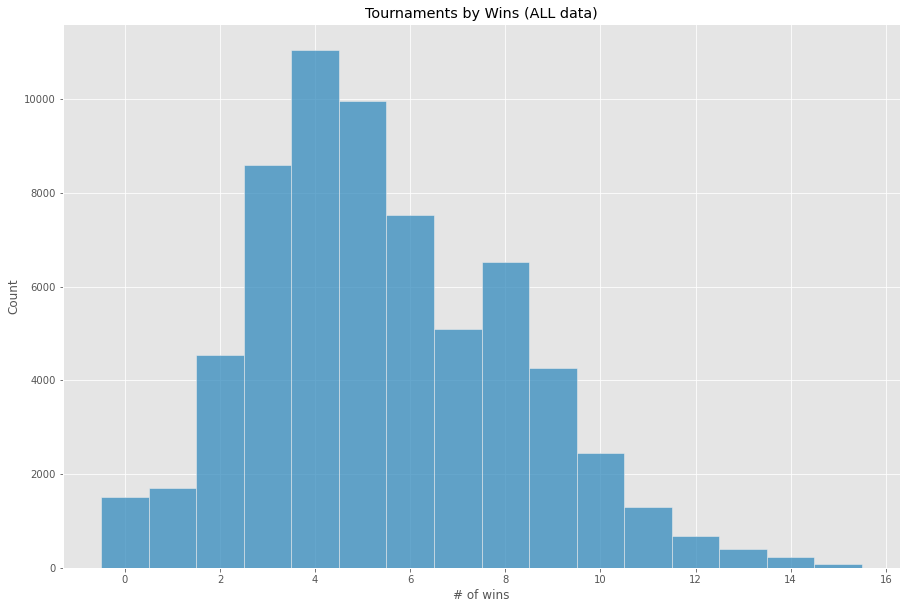

In [3]:
# note that this includes a mix of data -- lower division records will be 7 matches total.
# hence the spike at 4
seaborn.histplot(data=df, x="Win", discrete=True).set(
        title='Tournaments by Wins (ALL data)',
        xlabel='# of wins',
        ylabel='Count') 

[Text(0.5, 1.0, 'Tournaments by Wins (Divisions 1 & 2)'),
 Text(0.5, 0, '# of wins'),
 Text(0, 0.5, 'Count')]

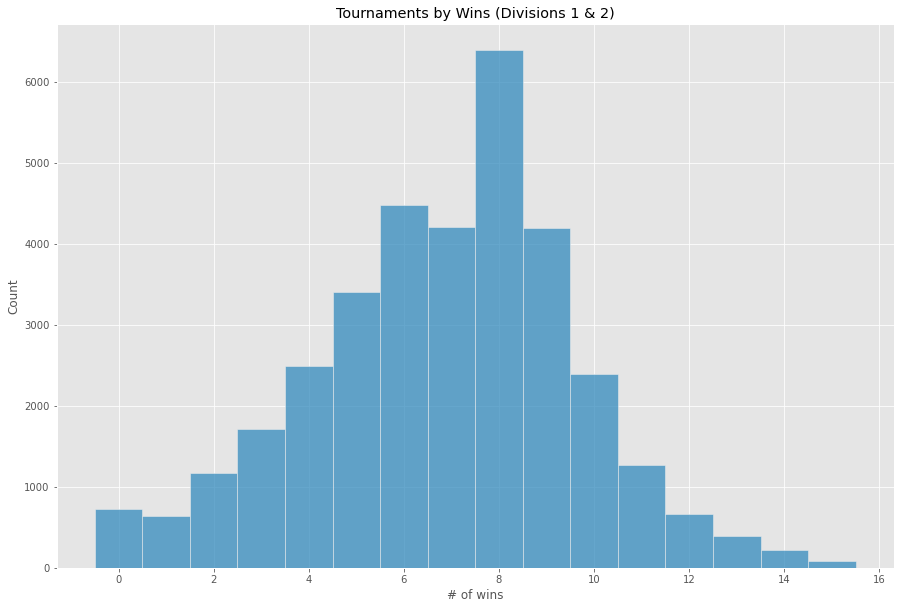

In [4]:
upper = df[df.Rank.apply(lambda x: rank_helper.rank_is_top(x))]
seaborn.histplot(data=upper, x="Win", discrete=True).set(
        title='Tournaments by Wins (Divisions 1 & 2)',
        xlabel='# of wins',
        ylabel='Count') 

[Text(0.5, 1.0, 'Tournaments by Wins (Division 1 + Sanyaku)'),
 Text(0.5, 0, '# of wins'),
 Text(0, 0.5, 'Count')]

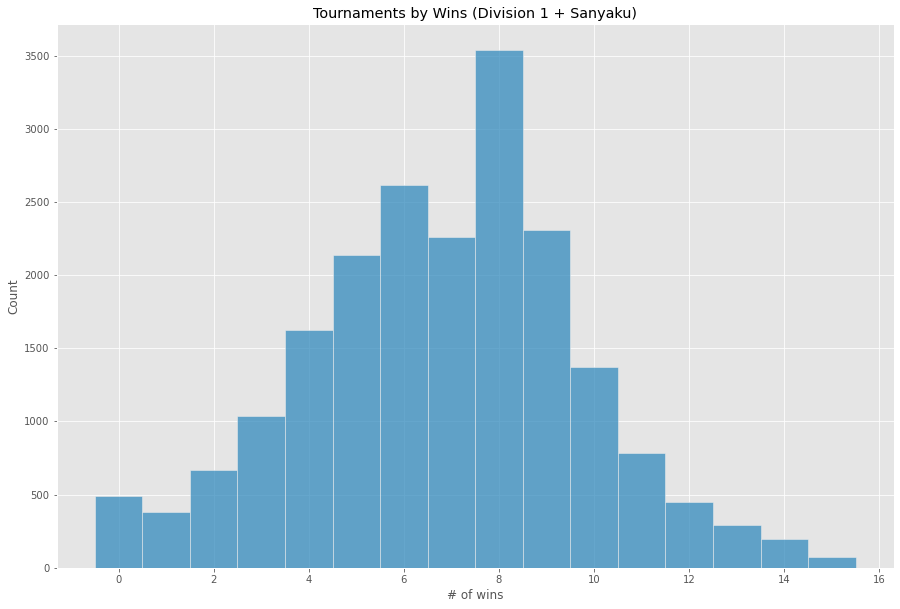

In [5]:
div1 = upper[upper.Rank.apply(lambda x: rank_helper.divisions[rank_helper.long_rank(x)] >= 6)]

seaborn.histplot(data=div1, x="Win", discrete=True).set(
        title='Tournaments by Wins (Division 1 + Sanyaku)',
        xlabel='# of wins',
        ylabel='Count') 


[Text(0.5, 1.0, 'Tournaments by Wins (Sanyaku)'),
 Text(0.5, 0, '# of wins'),
 Text(0, 0.5, 'Count')]

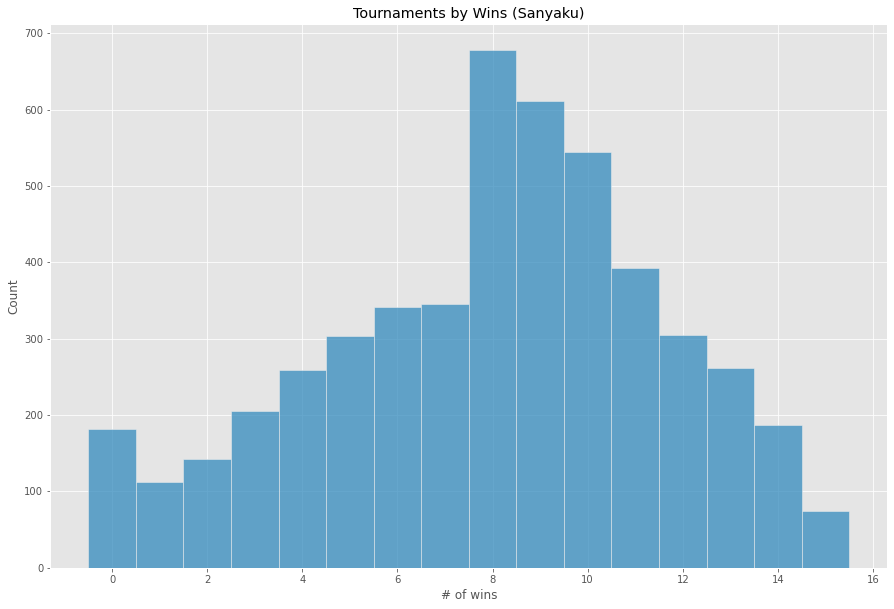

In [6]:
s = div1[div1.Rank.apply(lambda x: rank_helper.rank_is_sanyaku(x))]

seaborn.histplot(data=s, x="Win", discrete=True).set(
        title='Tournaments by Wins (Sanyaku)',
        xlabel='# of wins',
        ylabel='Count') 

<br>

# Analysis with pusher metric

In [7]:
def push_class(score):
    if score < -0.2:
        return 'Full pusher'
    elif score < 0:
        return 'Moderate pusher'
    elif score < 0.2:
        return 'Moderate other'
    else:
        return 'Full other'

In [8]:
stats_df = pd.read_csv(f'stats_by_id.csv')

# ONLY LOOKING AT MORE THAN 40 career wins!
stats_df = stats_df[stats_df.n > 40]

#stats_df['push_class'] = stats_df.apply(lambda row: pusher_class(row.m) )
for i, row in stats_df.iterrows():
    stats_df.at[i, 'push_class'] = push_class(row['m'])

    
stats_df.head(20)
stats_df.shape

(901, 5)

[Text(0.5, 1.0, 'm distribution'),
 Text(0.5, 0, 'score'),
 Text(0, 0.5, 'Count')]

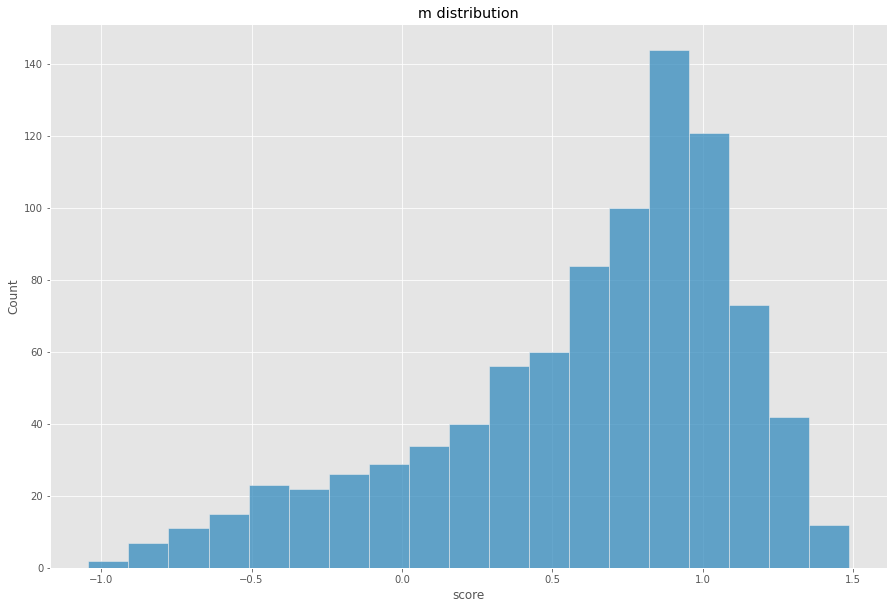

In [9]:
seaborn.histplot(data=stats_df, x="m").set(
        title='m distribution',
        xlabel='score',
        ylabel='Count') 


<AxesSubplot:xlabel='push_class', ylabel='count'>

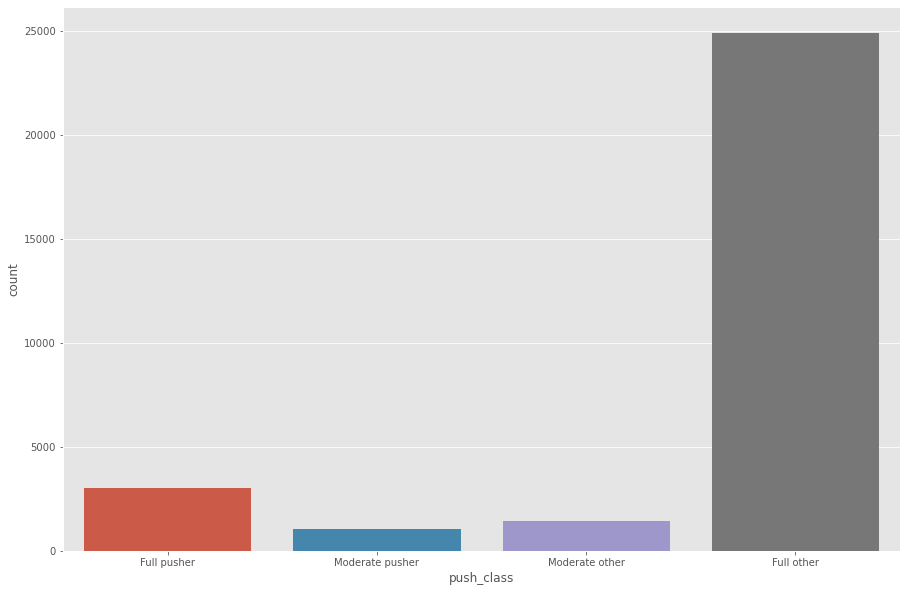

In [10]:
# note this is only a merge on the top two ranks
full = pd.merge(upper, stats_df, on="id")
full.dropna()
seaborn.countplot(x="push_class", order=['Full pusher', 'Moderate pusher', 'Moderate other', 'Full other'], data=full)

[Text(0.5, 1.0, 'wins against metric'),
 Text(0.5, 0, 'wins'),
 Text(0, 0.5, 'metric score')]

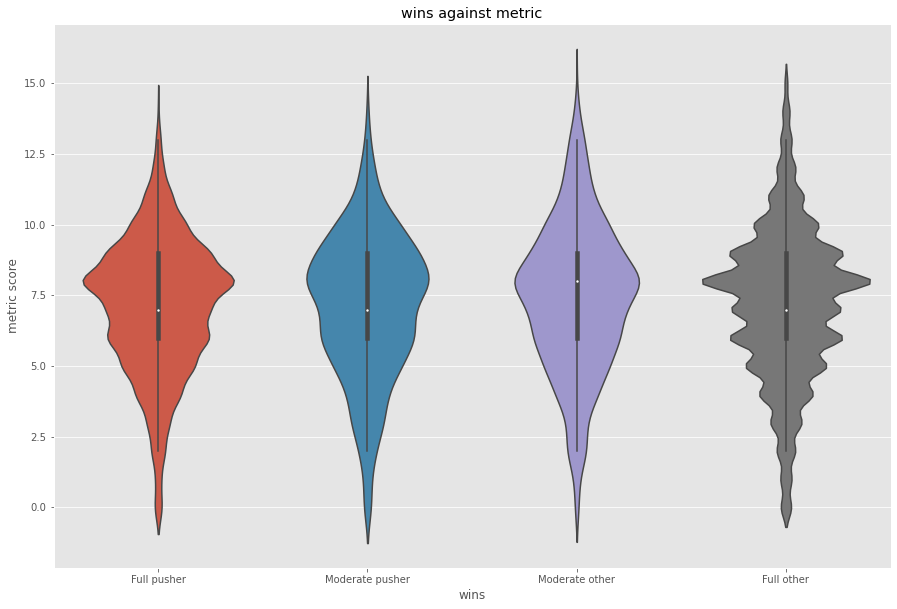

In [11]:
# doesn't look like a whole lot of difference from immediate metric comparison.
# note that the counts are very different, as noted above
seaborn.violinplot(data=full, 
                   x='push_class', 
                   y='Win', 
                   order=['Full pusher', 'Moderate pusher', 'Moderate other', 'Full other']
                  ).set(
                    title='wins against metric',
                    xlabel='wins',
                    ylabel='metric score'
                  ) 

<br>

# Categorical win visualization

In [12]:
# convert date str to datetime
full['Date'] = pd.to_datetime(full['Date'].astype(str), format='%Y-%m-%d')

In [13]:
# example, hakuho
full[full.id == 1123]

,id,Date,Rank,Series,W_L,Win,Loss,Forfeit,Absence,Winrate,Streak(Wins),m,p,n,push_class
6565,1123,2004-01-01,J12e,WWLWLWWWLWLLWWL,9-6,9.0,6.0,0.0,0.0,60.00,N,1.004299,0.173028,1179.0,Full other
6566,1123,2004-03-01,J8w,LWWWWLWWLWWWWWW,12-3 Y,12.0,3.0,0.0,0.0,80.00,Y,1.004299,0.173028,1179.0,Full other
6567,1123,2004-05-01,M16e,WWWLLWWWWWLWWWW,12-3,12.0,3.0,0.0,0.0,80.00,Y,1.004299,0.173028,1179.0,Full other
6568,1123,2004-07-01,M8e,WWWLWWLWLWWWWLW,11-4,11.0,4.0,0.0,0.0,73.33,Y,1.004299,0.173028,1179.0,Full other
6569,1123,2004-09-01,M3e,WLLWWWLWLWLLLWW,8-7,8.0,7.0,0.0,0.0,53.33,N,1.004299,0.173028,1179.0,Full other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6653,1123,2019-11-01,Y1w,WLWWWWWWWWWWWWW,14-1 Y,14.0,1.0,0.0,0.0,93.33,Y,1.004299,0.173028,1179.0,Full other
6654,1123,2020-01-01,Y1e,WLLAFFFFFFFFFFF,1-3-11,1.0,2.0,11.0,1.0,33.33,N,1.004299,0.173028,1179.0,Full other
6655,1123,2020-03-01,Y1e,WWWWWWWWWLWLWWW,13-2 Y,13.0,2.0,0.0,0.0,86.67,Y,1.004299,0.173028,1179.0,Full other
6656,1123,2020-07-01,Y1e,WWWWWWWWWWLLAFF,10-3-2,10.0,2.0,2.0,1.0,83.33,Y,1.004299,0.173028,1179.0,Full other


In [14]:
sig_wins_high = 11
sig_wins_low = 6

full_pushers = full.query("push_class == 'Full pusher'")
mod_pushers = full.query("push_class == 'Moderate pusher'")
full_others = full.query("push_class == 'Full other'")
mod_others = full.query("push_class == 'Moderate other'")



frames = [full_pushers, mod_pushers, mod_others, full_others]

# get score history of three tourneys (mean) from starting point of low wins, med wins, high wins
# [ [low_1, low_2, low_3, n]    [...]    [...]]
scopes = [ [[0] * 4 for i in range(0, 3)] for j in range(0, 4) ]
diff = [ [[] * 4 for i in range(0, 3)] for j in range(0, 4) ]

full['prev_wins'] = np.nan

# for each group, 
# m = group nubmers: 0 = full_pushers, 1 = mod_pushers, 2 = full_others, 3 = mod_others
for m in range(0, 4):
    
    # for each id, 
    for w_id, group in frames[m].groupby("id"):
        
#         if w_id == 1123:
#             print("fuck hakuho")
#             break
        #print(group)
        
        # reset index to make sure we are accessing consecutive rows
        group.reset_index(inplace=True)
        
        # for each tournament, 
        for i, row in group.iterrows():
                                
            #if i < group.shape[0] - 1:
            #    td = abs(group['Date'].iat[i+1] - group['Date'].iat[i])
                
            #    if td.total_seconds() < 5616000: # diff is less than 65 days (2 months 5 days)
                    
            #        group['prev_wins'].iat[i+1] = group['Win'].iat[i]
                    
                
                    
            if i < group.shape[0] - 2: # make sure we're not trying to grab data past the last two basho
                k = 0
                # 0 = low < 6, 1 = med > 6, 2 = high > 11
                if row.Win < sig_wins_low: # low w
                    k = 0
                elif row.Win < sig_wins_high: # med w
                    k = 1
                else: # high w 
                    k = 2
                
                # NOTE: this could be in n-1 => n as well, but it's here for convenience!!!
                diff[m][k].append(group['Win'].iat[i] - group['Win'].iat[i+1])
                
                # we should only be recording CONSECUTIVE bashos.
                td = abs(group['Date'].iat[i+2] - group['Date'].iat[i])
                
                if td.total_seconds() < 10800000: # diff is less than 125 days (four months and then some)
                    scopes[m][k][0] += group['Win'].iat[i]
                    scopes[m][k][1] += group['Win'].iat[i+1]
                    scopes[m][k][2] += group['Win'].iat[i+2]
                    scopes[m][k][3] += 1
                else:
                    pass
                    #print(f"{int(td.total_seconds() / 86400 / 30)} months from {group['Date'].iat[i]} and {group['Date'].iat[i+2]}")

In [15]:
full.head()

,id,Date,Rank,Series,W_L,Win,Loss,Forfeit,Absence,Winrate,Streak(Wins),m,p,n,push_class,prev_wins
0,1,1990-03-01,J12w,LLWWLWWLLWWWWLL,8-7,8.0,7.0,0.0,0.0,53.33,Y,0.027626,0.490066,604.0,Moderate other,NaN
1,1,1990-05-01,J10w,LWWWWWWWLLWLWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,NaN
2,1,1990-07-01,J3e,WWWWLWLLWWLWWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,NaN
3,1,1990-09-01,M14e,WWWLLWWWLWLLWWL,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,NaN
4,1,1990-11-01,M7w,WLWWLLLWWWLLWWW,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,NaN


In [16]:
# getting previous tournament wins (less than 2 months apart)
for i, row in full.iterrows():                                
    if i < full.shape[0] - 1:
        if(full['id'].iat[i+1]  == full['id'].iat[i]):
            td = abs(full['Date'].iat[i+1] - full['Date'].iat[i])  
            if td.total_seconds() < 5616000: # diff is less than 65 days (2 months 5 days)
                full['prev_wins'].iat[i+1] = full['Win'].iat[i]


In [17]:
full

,id,Date,Rank,Series,W_L,Win,Loss,Forfeit,Absence,Winrate,Streak(Wins),m,p,n,push_class,prev_wins
0,1,1990-03-01,J12w,LLWWLWWLLWWWWLL,8-7,8.0,7.0,0.0,0.0,53.33,Y,0.027626,0.490066,604.0,Moderate other,NaN
1,1,1990-05-01,J10w,LWWWWWWWLLWLWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,8.0
2,1,1990-07-01,J3e,WWWWLWLLWWLWWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,11.0
3,1,1990-09-01,M14e,WWWLLWWWLWLLWWL,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,11.0
4,1,1990-11-01,M7w,WLWWLLLWWWLLWWW,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30369,12470,2020-01-01,J3w,LLLLLLLWLLLLWWL,3-12,3.0,12.0,0.0,0.0,20.00,N,-0.700176,0.865854,82.0,Full pusher,10.0
30370,12470,2020-03-01,J9e,LLWLLLWWLLWWLLW,6-9,6.0,9.0,0.0,0.0,40.00,N,-0.700176,0.865854,82.0,Full pusher,3.0
30371,12470,2020-07-01,J11w,WLLLLWLLWWWLWLW,7-8,7.0,8.0,0.0,0.0,46.67,N,-0.700176,0.865854,82.0,Full pusher,NaN
30372,12575,2021-01-01,J14w,LWWLLWWLLWWLWWL,8-7,8.0,7.0,0.0,0.0,53.33,N,-0.405829,0.732143,56.0,Full pusher,NaN


In [18]:
scopes

[[[1934.0, 3667.0, 3382.0, 476],
  [14961.0, 13641.0, 13386.0, 1897],
  [1872.0, 1187.0, 1217.0, 163]],
 [[596.0, 1135.0, 999.0, 148],
  [4640.0, 4238.0, 4153.0, 582],
  [685.0, 460.0, 420.0, 59]],
 [[839.0, 1602.0, 1423.0, 205],
  [6373.0, 5927.0, 5846.0, 798],
  [1725.0, 1315.0, 1334.0, 145]],
 [[13191.0, 25285.0, 22963.0, 3297],
  [103127.0, 94559.0, 93718.0, 13019],
  [21117.0, 15861.0, 15618.0, 1761]]]

In [19]:
res = [ [[0] * 3 for i in range(0, 3)] for j in range(0, 4) ]

# for all wrestler types
for m in range(0, 4):
    # for l/m/h
    for i in range(0, 3):
        # within each arr
        for j in range(0, 3):
            res[m][i][j] = scopes[m][i][j] / scopes[m][i][3]


In [20]:
# average win per consecutive tournaments
res

[[[4.063025210084033, 7.703781512605042, 7.105042016806722],
  [7.886663152345809, 7.19082762256194, 7.056404849762783],
  [11.484662576687116, 7.282208588957055, 7.466257668711656]],
 [[4.027027027027027, 7.668918918918919, 6.75],
  [7.972508591065292, 7.281786941580756, 7.135738831615121],
  [11.610169491525424, 7.796610169491525, 7.11864406779661]],
 [[4.092682926829268, 7.814634146341463, 6.941463414634146],
  [7.986215538847118, 7.427318295739348, 7.325814536340852],
  [11.89655172413793, 9.068965517241379, 9.2]],
 [[4.000909918107371, 7.669093114952988, 6.964816499848347],
  [7.921268914663185, 7.26315385206237, 7.1985559566787005],
  [11.991482112436115, 9.006814310051107, 8.868824531516184]]]

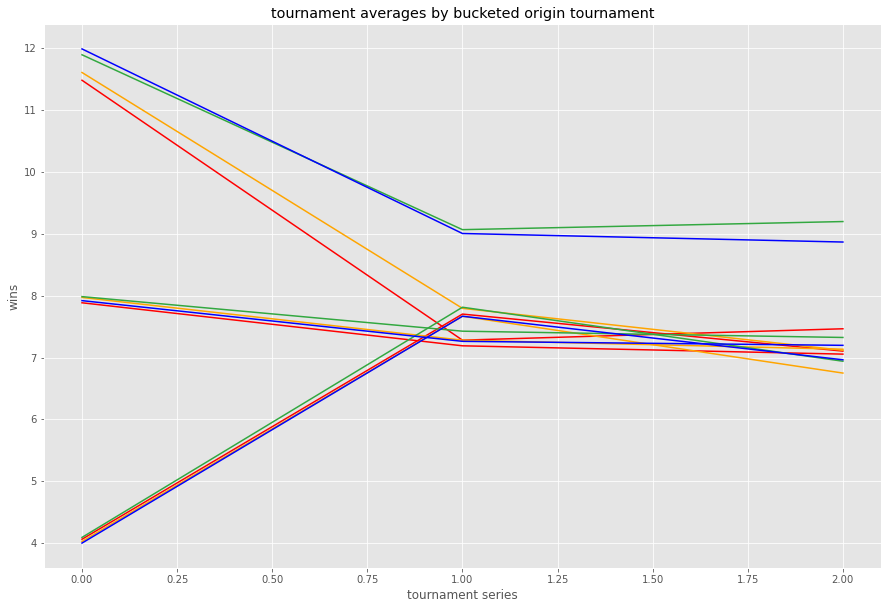

In [21]:
# we want to see the progression between tournaments. line graph of 0, 1, 2
#         full push   mod push  mod other   full other
#           red        orange     green        blue
colors = ['#ff0000', '#ffa500', '#32a840', '#0000FF']
i = 0

for m in res: # for pusher class (full push, etc.)
    for t_type in m: # for tournament type (low origin, mid, etc.)
        seaborn.lineplot(x=[0, 1, 2], y=t_type, color=colors[i]).set(
                    title='tournament averages by bucketed origin tournament',
                    xlabel='tournament series',
                    ylabel='wins'
                  ) 
    i += 1


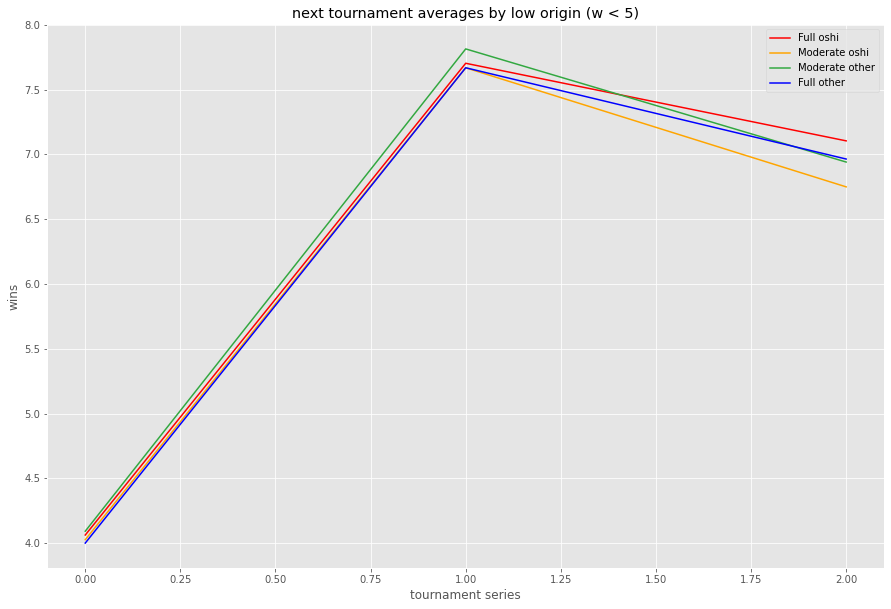

In [22]:
i = 0
for m in res: # for pusher class (full push, etc.)
    seaborn.lineplot(data=m[0], color=colors[i]).set(
                    title='next tournament averages by low origin (w < 5)',
                    xlabel='tournament series',
                    ylabel='wins'
                  ) 
    i += 1
plt.legend(labels=['Full oshi', 'Moderate oshi', 'Moderate other', 'Full other'])


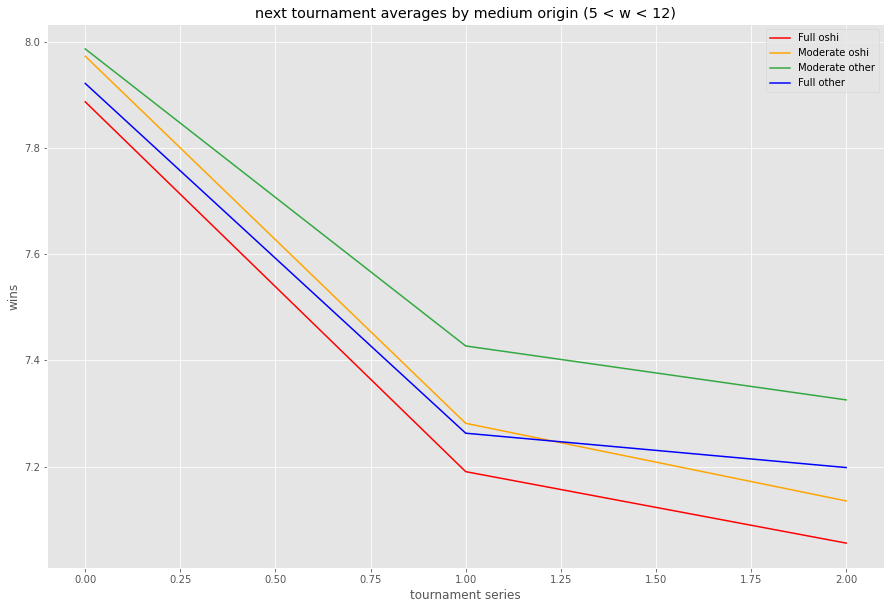

In [23]:
i = 0
for m in res: # for pusher class (full push, etc.)
    seaborn.lineplot(data=m[1], color=colors[i]).set(
                    title='next tournament averages by medium origin (5 < w < 12)',
                    xlabel='tournament series',
                    ylabel='wins'
                  ) 
    i += 1
plt.legend(labels=['Full oshi', 'Moderate oshi', 'Moderate other', 'Full other'])


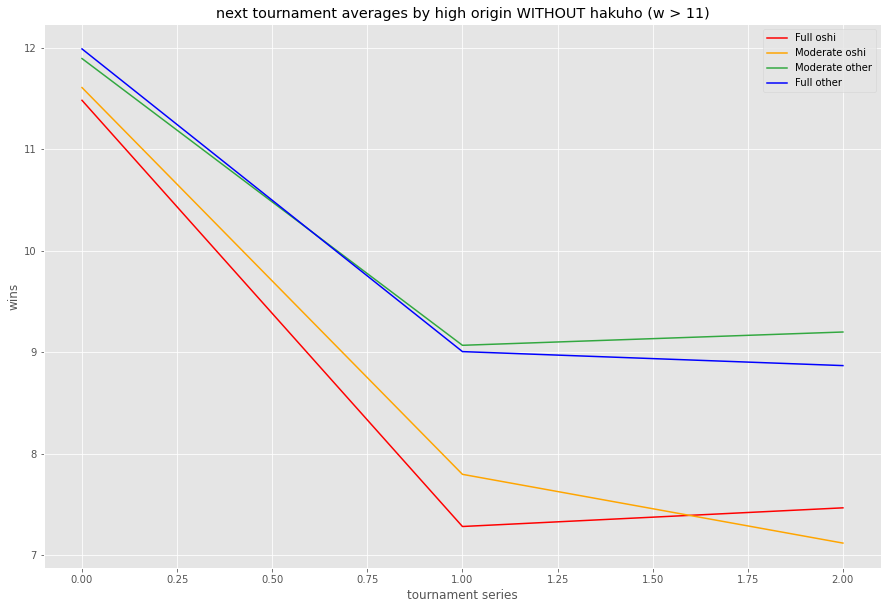

In [24]:
i = 0
for m in res: # for pusher class (full push, etc.)
    seaborn.lineplot(data=m[2], color=colors[i]).set(
                    title='next tournament averages by high origin WITHOUT hakuho (w > 11)',
                    xlabel='tournament series',
                    ylabel='wins',
                  ) 
    i += 1
    
plt.legend(labels=['Full oshi', 'Moderate oshi', 'Moderate other', 'Full other'])


([<matplotlib.axis.XTick at 0x7f4d41984790>,
 [Text(0, 0, '11+'), Text(1, 0, 'mid'), Text(2, 0, '6-')])

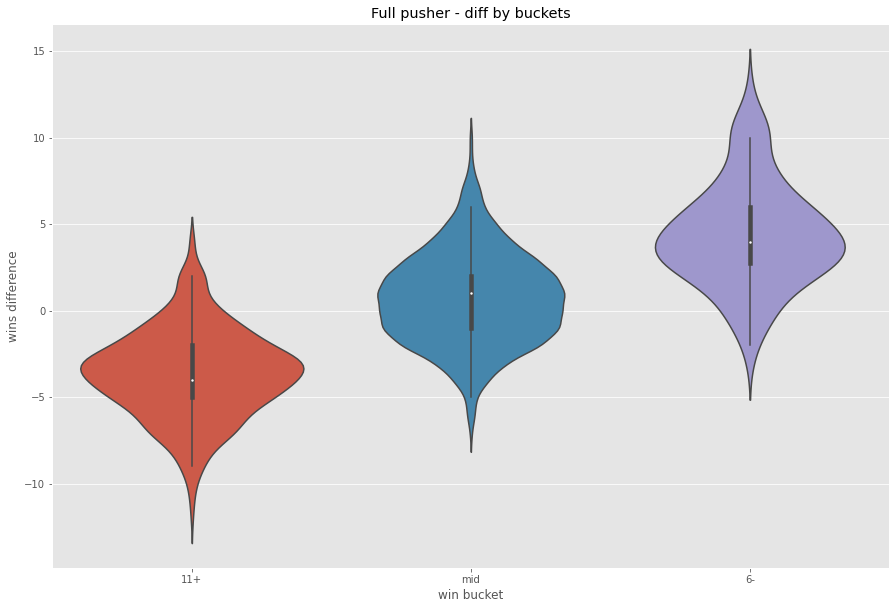

In [25]:
seaborn.violinplot(data=diff[0]).set(
                    title='Full pusher - diff by buckets',
                    xlabel='win bucket',
                    ylabel='wins difference'
                  ) 

plt.xticks([0,1,2], ("11+", "mid", "6-"))


([<matplotlib.axis.XTick at 0x7f4d418e6a30>,
 [Text(0, 0, '11+'), Text(1, 0, 'mid'), Text(2, 0, '6-')])

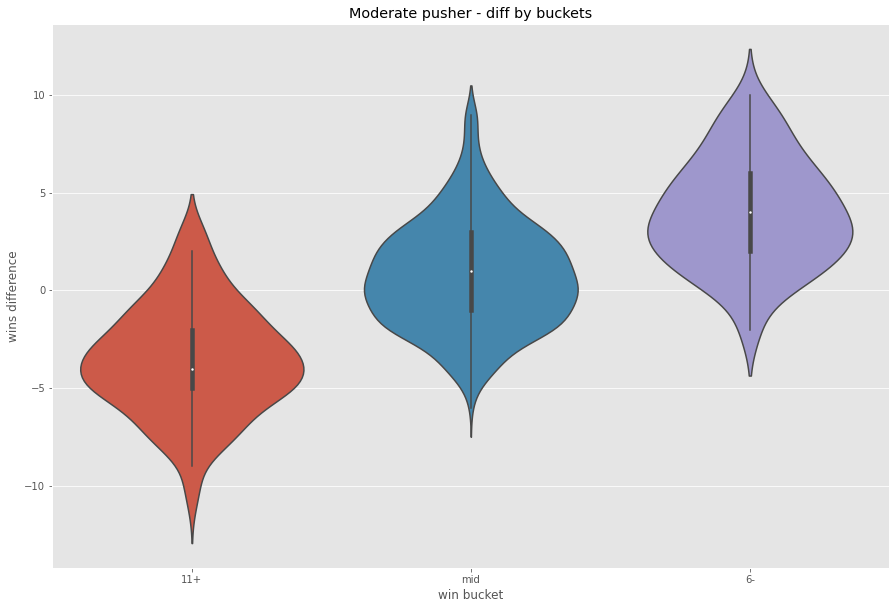

In [26]:
seaborn.violinplot(data=diff[1]).set(
                    title='Moderate pusher - diff by buckets',
                    xlabel='win bucket',
                    ylabel='wins difference'
                  ) 

plt.xticks([0,1,2], ("11+", "mid", "6-"))

## Note the difference in the 11+ means from the graphs above and those below. It was shown in the line graphs, but the oshi style seems to do considerably worse after a good basho.

([<matplotlib.axis.XTick at 0x7f4d418601c0>,
 [Text(0, 0, '11+'), Text(1, 0, 'mid'), Text(2, 0, '6-')])

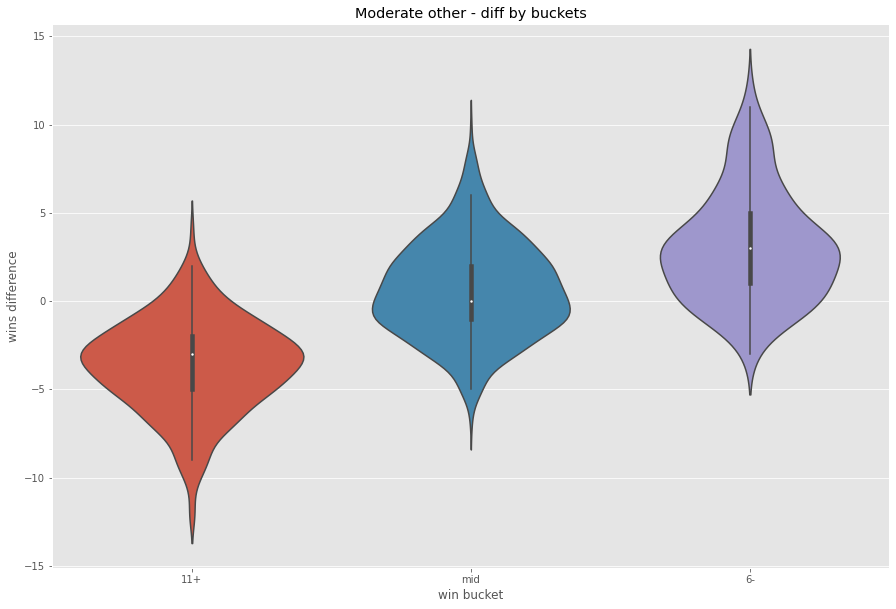

In [27]:
seaborn.violinplot(data=diff[2]).set(
                    title='Moderate other - diff by buckets',
                    xlabel='win bucket',
                    ylabel='wins difference'
                  ) 

plt.xticks([0,1,2], ("11+", "mid", "6-"))

([<matplotlib.axis.XTick at 0x7f4d417d40a0>,
 [Text(0, 0, '11+'), Text(1, 0, 'mid'), Text(2, 0, '6-')])

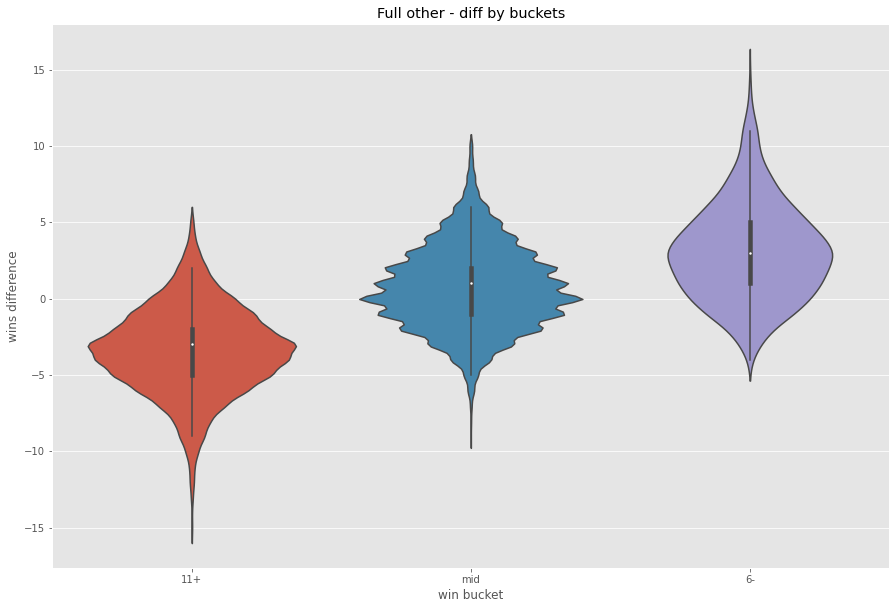

In [28]:
seaborn.violinplot(data=diff[3]).set(
                    title='Full other - diff by buckets',
                    xlabel='win bucket',
                    ylabel='wins difference'
                  ) 

plt.xticks([0,1,2], ("11+", "mid", "6-"))

([<matplotlib.axis.XTick at 0x7f4d41748430>,
 [Text(0, 0, 'Full oshi'),
  Text(1, 0, 'Moderate oshi'),
  Text(2, 0, 'Moderate other'),
  Text(3, 0, 'Full other')])

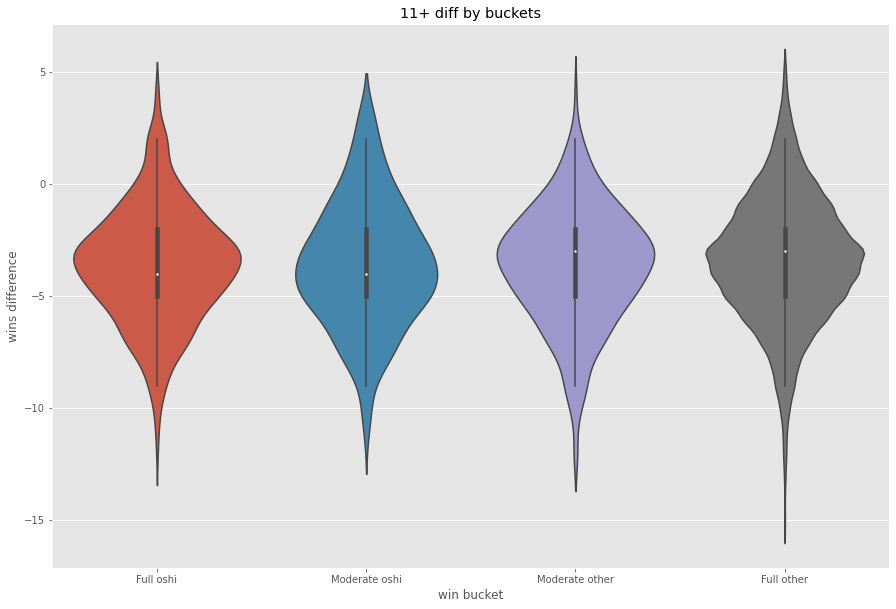

In [29]:
seaborn.violinplot(data=[diff[0][0], diff[1][0], diff[2][0], diff[3][0]]).set(
                    title='11+ diff by buckets',
                    xlabel='win bucket',
                    ylabel='wins difference'
                  ) 

plt.xticks([0, 1, 2, 3], ('Full oshi', 'Moderate oshi', 'Moderate other', 'Full other'))

<br>

# Fitting a model

In [30]:
full.head()

,id,Date,Rank,Series,W_L,Win,Loss,Forfeit,Absence,Winrate,Streak(Wins),m,p,n,push_class,prev_wins
0,1,1990-03-01,J12w,LLWWLWWLLWWWWLL,8-7,8.0,7.0,0.0,0.0,53.33,Y,0.027626,0.490066,604.0,Moderate other,NaN
1,1,1990-05-01,J10w,LWWWWWWWLLWLWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,8.0
2,1,1990-07-01,J3e,WWWWLWLLWWLWWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,11.0
3,1,1990-09-01,M14e,WWWLLWWWLWLLWWL,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,11.0
4,1,1990-11-01,M7w,WLWWLLLWWWLLWWW,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,9.0


In [45]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
temp = full
bb = pd.DataFrame(temp.Rank.apply(lambda x: rank_helper.full_rank(x)))
k = bb['Rank'].tolist() 
test2 = temp
test2[['div','ranked']] = pd.DataFrame(k, index = test2.index)
test2.head()



,id,Date,Rank,Series,W_L,Win,Loss,Forfeit,Absence,Winrate,Streak(Wins),m,p,n,push_class,prev_wins,div,ranked,predict
0,1,1990-03-01,J12w,LLWWLWWLLWWWWLL,8-7,8.0,7.0,0.0,0.0,53.33,Y,0.027626,0.490066,604.0,Moderate other,NaN,Juryo,12,NaN
1,1,1990-05-01,J10w,LWWWWWWWLLWLWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,8.0,Juryo,10,7.481679
2,1,1990-07-01,J3e,WWWWLWLLWWLWWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,11.0,Juryo,3,7.328607
3,1,1990-09-01,M14e,WWWLLWWWLWLLWWL,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,11.0,Maegashira,14,7.128257
4,1,1990-11-01,M7w,WLWWLLLWWWLLWWW,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,9.0,Maegashira,7,6.843217


In [51]:
#full['m'] = full['m']

est2 = smf.ols(formula='Win ~ m + div + ranked + prev_wins', data = test2).fit()
est2.summary()

#est3 = logit('p ~ m + div + ranked + prev_wins', test2).fit()
#est3.summary()
# Juryo == dummy variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     304.5
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        19:45:34   Log-Likelihood:                -56430.
No. Observations:               24473   AIC:                         1.129e+05
Df Residuals:                   24464   BIC:                         1.130e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.9371      0.068    102.677      0.000       6.805       7.070
div[T.Komusubi]      -0.6207      0.090     -6.932      0.000      -0.796      -0.445
div[T.Maegashira]    -0.5653      0.034    -16.523      0.000      -0.632      -0.498
div[T.Ozeki]          1.5778      0.076     20.676      0.000       1.428       1.727
div[T.Sekiwake]       0.6396      0.089      7.180      0.000       0.465       0.814
div[T.Yokozuna]       3.2022      0.098     32.543      0.000       3.009       3.395
m                     0.0586      0.028      2.072      0.038       0.003       0.114
ranked                0.0332      0.004      8.594      0.000       0.026       0.041
prev_wins             0.0264      0.007      3.756      0.000       0.013       0.040
==============================================================================
Omnibus:                     1493.376   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2100.209
Skew:                          -0.543   Prob(JB):                         0.00
Kurtosis:                       3.937   Cond. No.                         76.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
est2.params

Intercept            6.937122
div[T.Komusubi]     -0.620705
div[T.Maegashira]   -0.565318
div[T.Ozeki]         1.577828
div[T.Sekiwake]      0.639565
div[T.Yokozuna]      3.202176
m                    0.058623
ranked               0.033179
prev_wins            0.026394
dtype: float64

In [34]:
est2.pvalues

Intercept             0.000000e+00
div[T.Komusubi]       4.242860e-12
div[T.Maegashira]     5.355722e-61
div[T.Ozeki]          3.668070e-94
div[T.Sekiwake]       7.160307e-13
div[T.Yokozuna]      1.880872e-227
m                     3.830469e-02
ranked                8.928166e-18
prev_wins             1.731403e-04
dtype: float64

In [35]:
def predict(m,div,ranked,prev_wins):
    d = [[0,'',0,0]]
    f1 = pd.DataFrame(d, columns = ['m','div','ranked','prev_wins'])

    f1['div'].iat[0] = div
    f1['m'].iat[0] = m
    f1['ranked'].iat[0] = ranked 
    f1['prev_wins'].iat[0] = prev_wins

    p = est2.predict(f1.loc[:,['m', 'div','ranked','prev_wins']])
    return p

In [71]:
predict(1.3,"Maegashira",8,10).iloc[0]

6.95979356258028

In [37]:
temp['predict'] = est2.predict(full.loc[:,['m', 'div','ranked','prev_wins']])
temp.head(100)

,id,Date,Rank,Series,W_L,Win,Loss,Forfeit,Absence,Winrate,Streak(Wins),m,p,n,push_class,prev_wins,div,ranked,predict
0,1,1990-03-01,J12w,LLWWLWWLLWWWWLL,8-7,8.0,7.0,0.0,0.0,53.33,Y,0.027626,0.490066,604.0,Moderate other,NaN,Juryo,12,NaN
1,1,1990-05-01,J10w,LWWWWWWWLLWLWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,8.0,Juryo,10,7.481679
2,1,1990-07-01,J3e,WWWWLWLLWWLWWWW,11-4,11.0,4.0,0.0,0.0,73.33,Y,0.027626,0.490066,604.0,Moderate other,11.0,Juryo,3,7.328607
3,1,1990-09-01,M14e,WWWLLWWWLWLLWWL,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,11.0,Maegashira,14,7.128257
4,1,1990-11-01,M7w,WLWWLLLWWWLLWWW,9-6,9.0,6.0,0.0,0.0,60.00,N,0.027626,0.490066,604.0,Moderate other,9.0,Maegashira,7,6.843217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1996-05-01,Y1e,WWWWWLWWWWWWWWW,14-1 Y,14.0,1.0,0.0,0.0,93.33,Y,1.220098,0.075798,752.0,Full other,14.0,Yokozuna,1,10.613513
96,2,1996-07-01,Y1e,WWLWWWWWWWWWLWW,13-2 Y,13.0,2.0,0.0,0.0,86.67,Y,1.220098,0.075798,752.0,Full other,14.0,Yokozuna,1,10.613513
97,2,1996-09-01,Y1e,WWWWWWWWWWWWWWW,15-0 Y,15.0,0.0,0.0,0.0,100.00,Y,1.220098,0.075798,752.0,Full other,13.0,Yokozuna,1,10.587119
98,2,1997-01-01,Y1w,WWWLLWWWWWWWWWW,13-2 J,13.0,2.0,0.0,0.0,86.67,Y,1.220098,0.075798,752.0,Full other,NaN,Yokozuna,1,NaN


In [59]:
# get the pushers and non pushers
testz = full.loc[full['m'] >= 1]
testz2 = full.loc[full['m'] < 1]

In [62]:
# mean of non-pushers
mean1 = testz['Win'].mean()
mean1

7.529567430025446

In [63]:
# mean of pushers
mean2 = testz2['Win'].mean()
mean2

7.056207114701445

In [38]:
full.loc[full['id'] == 1123]

,id,Date,Rank,Series,W_L,Win,Loss,Forfeit,Absence,Winrate,Streak(Wins),m,p,n,push_class,prev_wins,div,ranked,predict
6565,1123,2004-01-01,J12e,WWLWLWWWLWLLWWL,9-6,9.0,6.0,0.0,0.0,60.00,N,1.004299,0.173028,1179.0,Full other,NaN,Juryo,12,NaN
6566,1123,2004-03-01,J8w,LWWWWLWWLWWWWWW,12-3 Y,12.0,3.0,0.0,0.0,80.00,Y,1.004299,0.173028,1179.0,Full other,9.0,Juryo,8,7.498970
6567,1123,2004-05-01,M16e,WWWLLWWWWWLWWWW,12-3,12.0,3.0,0.0,0.0,80.00,Y,1.004299,0.173028,1179.0,Full other,12.0,Maegashira,16,7.278264
6568,1123,2004-07-01,M8e,WWWLWWLWLWWWWLW,11-4,11.0,4.0,0.0,0.0,73.33,Y,1.004299,0.173028,1179.0,Full other,12.0,Maegashira,8,7.012833
6569,1123,2004-09-01,M3e,WLLWWWLWLWLLLWW,8-7,8.0,7.0,0.0,0.0,53.33,N,1.004299,0.173028,1179.0,Full other,11.0,Maegashira,3,6.820545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6653,1123,2019-11-01,Y1w,WLWWWWWWWWWWWWW,14-1 Y,14.0,1.0,0.0,0.0,93.33,Y,1.004299,0.173028,1179.0,Full other,0.0,Yokozuna,1,10.231352
6654,1123,2020-01-01,Y1e,WLLAFFFFFFFFFFF,1-3-11,1.0,2.0,11.0,1.0,33.33,N,1.004299,0.173028,1179.0,Full other,14.0,Yokozuna,1,10.600862
6655,1123,2020-03-01,Y1e,WWWWWWWWWLWLWWW,13-2 Y,13.0,2.0,0.0,0.0,86.67,Y,1.004299,0.173028,1179.0,Full other,1.0,Yokozuna,1,10.257745
6656,1123,2020-07-01,Y1e,WWWWWWWWWWLLAFF,10-3-2,10.0,2.0,2.0,1.0,83.33,Y,1.004299,0.173028,1179.0,Full other,NaN,Yokozuna,1,NaN


In [39]:
lst = test2['div'].values
lst = list(dict.fromkeys(lst))
for s in lst:
    print(s)

Juryo
Maegashira
Komusubi
Sekiwake
Ozeki
Yokozuna


* time series forecasting
* handling of multi-step data

things we can do:
* explore by era/date
* explore by rank
* explore by metric
* panel data for forecasting https://mixtape.scunning.com/panel-data.html